In [29]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

%matplotlib inline 


In [19]:
customer = pd.read_csv('TelcoCustomer.csv', index_col=0)
customer.shape

(7043, 20)

In [20]:
customer.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [21]:
customer.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [22]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

Columns with missing values: 0


<AxesSubplot:>

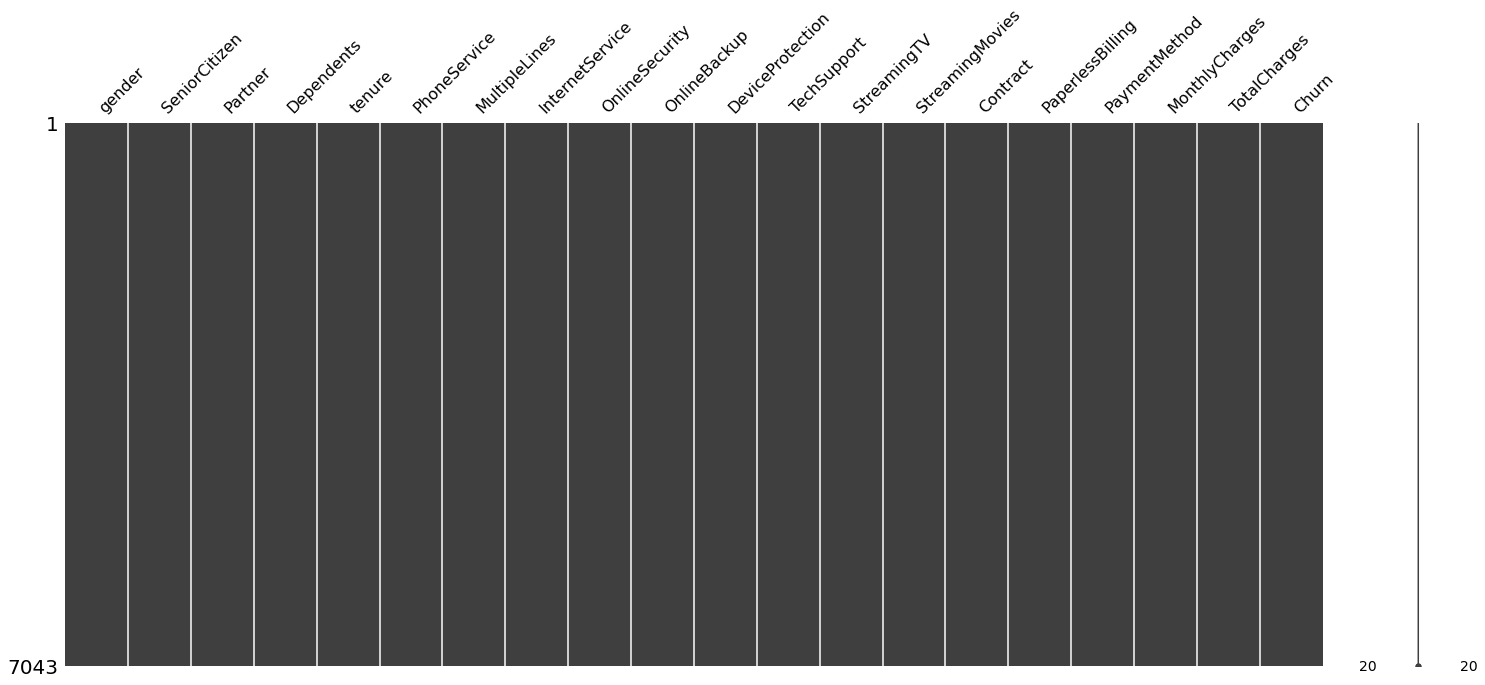

In [33]:
# check for the null values


columns_NA = customer.isna().sum()[customer.isna().sum() !=0].sort_values(ascending=False)

print('Columns with missing values:', len(columns_NA))



msno.matrix(customer)



# there all no null values in the dataset .

### Using the matrix we can quickly find out if there is any missing values . 
### From the visualiziation it is clear that the data set does not have any missing values.

In [24]:
# Remove the customer id from the dataset 

customer = customer.reset_index(drop=True)

customer

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [27]:
# convert All Categorical Values to numerical


customer['Partner'] = customer['Partner'].apply(lambda x: 0 if x=='No' else 1)
customer['Dependents'] = customer['Dependents'].apply(lambda x: 0 if x=='No' else 1)
customer['PhoneService'] = customer['PhoneService'].apply(lambda x: 0 if x=='No' else 1)
customer['OnlineSecurity'] = customer['OnlineSecurity'].apply(lambda x: 0 if x=='No' else 1)
customer['OnlineBackup'] = customer['OnlineBackup'].apply(lambda x: 0 if x=='No' else 1)
customer['DeviceProtection'] = customer['DeviceProtection'].apply(lambda x: 0 if x=='No' else 1)
customer['StreamingTV'] = customer['StreamingTV'].apply(lambda x: 0 if x=='No' else 1)
customer['StreamingMovies'] = customer['StreamingMovies'].apply(lambda x: 0 if x=='No' else 1)
customer['PaperlessBilling'] = customer['PaperlessBilling'].apply(lambda x: 0 if x=='No' else 1)
customer['Churn'] = customer['Churn'].apply(lambda x: 0 if x=='No' else 1)


customer

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,0,1,0,No,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,1,0,34,1,No,DSL,1,0,1,No,0,0,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,1,0,2,1,No,DSL,1,1,0,No,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,1,0,45,0,No phone service,DSL,1,0,1,Yes,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,1,0,2,1,No,Fiber optic,0,0,0,No,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,Yes,DSL,1,0,1,Yes,1,1,One year,1,Mailed check,84.80,1990.5,0
7039,Female,0,1,1,72,1,Yes,Fiber optic,0,1,1,No,1,1,One year,1,Credit card (automatic),103.20,7362.9,0
7040,Female,0,1,1,11,0,No phone service,DSL,1,0,0,No,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,Yes,Fiber optic,0,0,0,No,0,0,Month-to-month,1,Mailed check,74.40,306.6,1


In [38]:
# check if there are any zero values in tensure feature


customer[customer['tenure'] == 0].index

# we have 11 missing values , lets delete them 


customer.drop(labels=customer[customer['tenure'] == 0].index, axis=0, inplace=True)


customer[customer['tenure'] == 0].index


Int64Index([], dtype='int64')

In [39]:
customer.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [48]:
# get te unique number of every column






Categorical_Feature = customer.columns[customer.dtypes==object].tolist()


Numeric_Feature = customer.columns[customer.dtypes!=object].tolist()


        
print("-------------------- Categorical Fields --------------------\n")
for i in range(len(Categorical_Feature)):
    if customer[Categorical_Feature[i]].dtypes==object:
        print("Unique number of {} -> {}".format(Categorical_Feature[i],
                                                 len(customer[Categorical_Feature[i]].unique())))
        
print("\n-------------------- Numeric Fields --------------------\n")
for i in range(len(Numeric_Feature)):
    if customer[Numeric_Feature[i]].dtypes!=object:
        print("Unique number of {} -> {}".format(Numeric_Feature[i], 
                                                 len(customer[Numeric_Feature[i]].unique())))
        
        

-------------------- Categorical Fields --------------------

Unique number of gender -> 2
Unique number of MultipleLines -> 3
Unique number of InternetService -> 3
Unique number of TechSupport -> 3
Unique number of Contract -> 3
Unique number of PaymentMethod -> 4
Unique number of TotalCharges -> 6530

-------------------- Numeric Fields --------------------

Unique number of SeniorCitizen -> 2
Unique number of Partner -> 1
Unique number of Dependents -> 2
Unique number of tenure -> 72
Unique number of PhoneService -> 2
Unique number of OnlineSecurity -> 2
Unique number of OnlineBackup -> 2
Unique number of DeviceProtection -> 2
Unique number of StreamingTV -> 2
Unique number of StreamingMovies -> 2
Unique number of PaperlessBilling -> 2
Unique number of MonthlyCharges -> 1584
Unique number of Churn -> 2


In [49]:
for i in range(len(Categorical_Feature)):
    print("\n------------- {} -------------".format(Categorical_Feature[i]))
    print(customer[Categorical_Feature[i]].unique())


------------- gender -------------
['Female' 'Male']

------------- MultipleLines -------------
['No phone service' 'No' 'Yes']

------------- InternetService -------------
['DSL' 'Fiber optic' 'No']

------------- TechSupport -------------
['No' 'Yes' 'No internet service']

------------- Contract -------------
['Month-to-month' 'One year' 'Two year']

------------- PaymentMethod -------------
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

------------- TotalCharges -------------
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [50]:
# dropping duplicates

customer = customer.drop_duplicates()
customer.shape

(7009, 20)